In [2]:
import os
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 
import auditory_cortex.analysis.config as config
import auditory_cortex.helpers as helpers
import auditory_cortex.analysis.analysis as analysis
from utils_jgm.tikz_pgf_helpers import tpl_save

saved_results = '../../../saved_results/'



### analyzing STRF model

In [3]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

In [4]:
filename = 'STRF_corr_RidgeCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

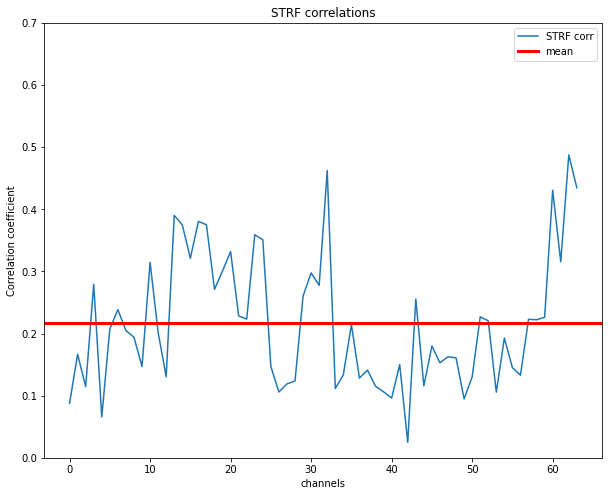

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [3]:
filename = 'STRF_corr_elasticNetCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

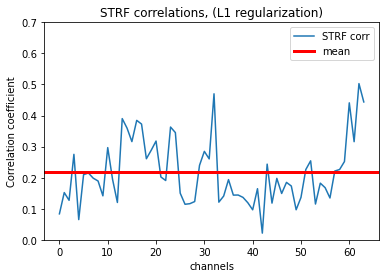

In [17]:
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations, (L1 regularization)")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [5]:
np.mean(baseline_corr)

0.2169307859864385

### analyzing whisper

In [3]:
model_name = 'whisper'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


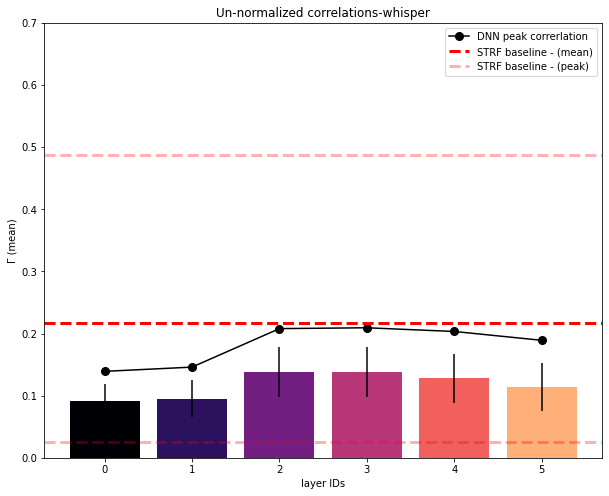

In [9]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing wav2vec2

In [30]:
model_name = 'wav2vec2'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)


0.10639355370350263


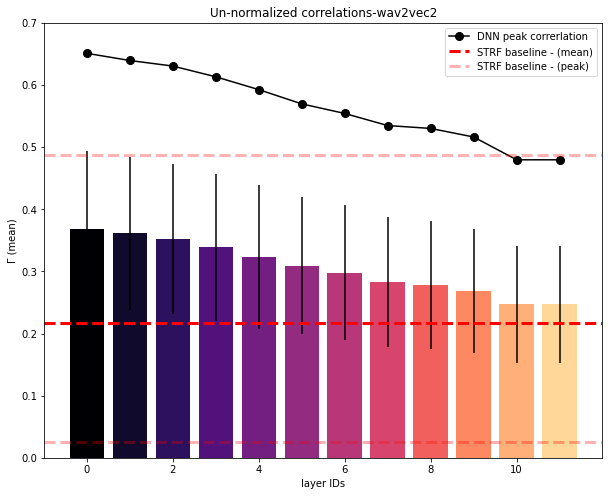

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing S2T

In [28]:
model_name = 'speech2text'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


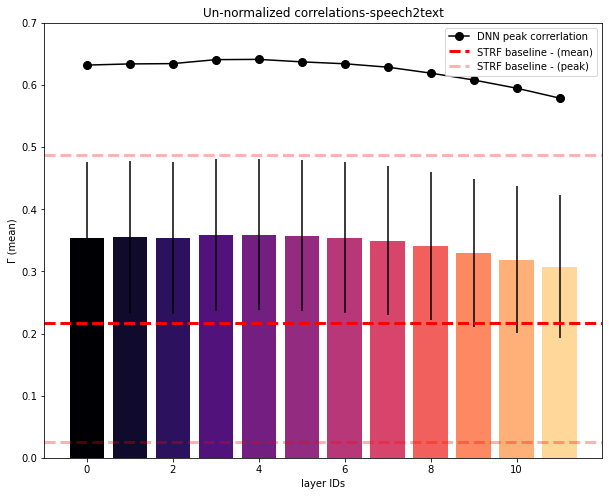

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [5]:
model_name = 'speech2text'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
# filename = f"{model_name}_corr_results.csv"
filename = 'speech2text_testing_for_modified_code.csv'
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


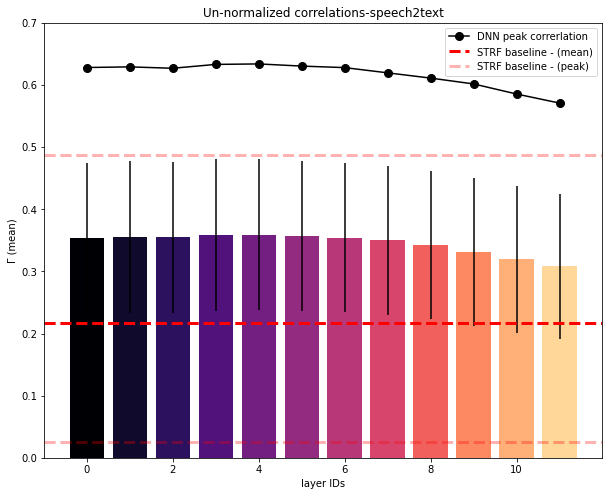

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing W2L

In [7]:
corr_obj = analysis.correlations()

0.10639355370350263


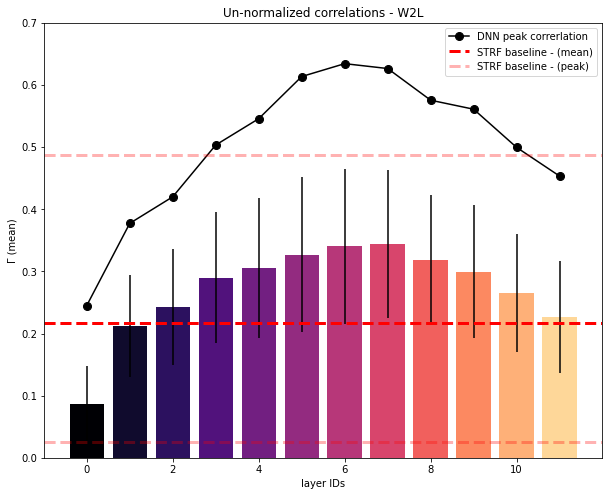

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Un-normalized correlations - W2L")
plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_unnormalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_unnormalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )
# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [2]:
corr_obj = analysis.correlations()

In [5]:
sessions = corr_obj.get_all_sessions()

In [7]:
for sess in sessions:
    ch = corr_obj.get_all_channels(sess)
    if len(ch) < 60:
        print(f"For {sess}, number of channels:{len(ch)}")

For 180731.0, number of channels:16
For 180720.0, number of channels:16
For 180807.0, number of channels:16
For 180627.0, number of channels:16
For 180717.0, number of channels:16
For 180725.0, number of channels:16
For 180613.0, number of channels:16
For 200318.0, number of channels:45
For 180730.0, number of channels:16
For 180728.0, number of channels:16
For 191212.0, number of channels:57
For 191115.0, number of channels:58
For 180622.0, number of channels:16
For 180502.0, number of channels:16
For 180501.0, number of channels:16
For 180420.0, number of channels:16
For 180413.0, number of channels:16
For 180814.0, number of channels:36
For 180724.0, number of channels:16
For 191209.0, number of channels:59
For 180719.0, number of channels:16
For 180808.0, number of channels:16
For 180810.0, number of channels:16


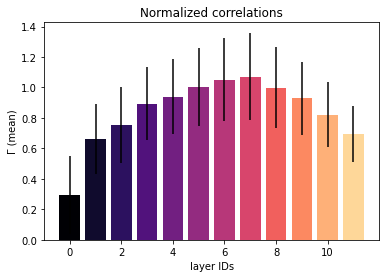

In [14]:
column = 'normalized_test_cc'
mean, std = corr_obj.summarize(session=session,
                        threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 1.0])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Normalized correlations")
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_normalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_normalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [11]:
corr_obj.data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458


In [13]:
std

layer
0.0     0.060497
1.0     0.081693
2.0     0.093584
3.0     0.105713
4.0     0.113145
5.0     0.124742
6.0     0.124421
7.0     0.119059
8.0     0.104809
9.0     0.107455
10.0    0.094863
11.0    0.089891
Name: std, dtype: float64